# Trabajo Práctico 3

### Integrantes:
* Menel Angelo - 1804789
* Vietto Santiago - 1802890

 ## Sentiment Analysis

Las siguientes librerias a importar son aquellas que nos ayudaran a correr las funciones que seran utilizadas a lo largo del proyecto:

In [ ]:
# Librerias

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.datasets import imdb
import tensorflow_datasets as tfds
from collections import Counter
import tensorflow as tf
import tensorflow_hub as hub

* os: se utiliza para realizar operaciones relacionadas con la gestión de archivos y directorios, como la creación, eliminación, cambio de directorio, etc.
* matplotlib.pyplot: se utiliza para generar gráficos, diagramas y visualizaciones de datos, lo que facilita la comprensión y la presentación de los resultados.
* keras: proporciona una API sencilla y elegante para definir arquitecturas de modelos, compilar modelos con funciones de pérdida y optimizadores, y entrenar modelos en conjuntos de datos.
* tensorflow.keras.datasets.imdb: se utiliza para cargar y acceder al conjunto de datos de IMDb para tareas de clasificación de sentimientos.
* tensorflow_datasets (tfds): permite cargar y acceder a diversos conjuntos de datos para su uso en tareas de entrenamiento y evaluación de modelos.
* collections.Counter: se utiliza para realizar recuentos y análisis de frecuencia de elementos, como palabras o elementos únicos en un conjunto de datos.
* tensorflow: proporciona herramientas y funciones para construir, entrenar y desplegar modelos de ML en una variedad de tareas y entornos.
* tensorflow_hub (hub): permite la reutilización de módulos de modelos preentrenados. Facilita la descarga, el uso y el intercambio de estos módulos, lo que permite a los usuarios aprovechar modelos preentrenados y realizar transferencia de aprendizaje en sus propios proyectos de aprendizaje automático.

Instalamos la libreria Keras y tensorflow para poder cargar el dataset que usaremos:

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


* La libreria Keras es una biblioteca que proporciona una interfaz de alto nivel para construir y entrenar redes neuronales, lo que facilita el desarrollo de modelos de deep learning.
* La libreria TensorFlow es una biblioteca que proporciona una arquitectura flexible y eficiente para realizar cálculos numéricos en grandes conjuntos de datos, lo que lo hace ideal para tareas de ML, procesamiento de imágenes, procesamiento del lenguaje natural y muchas otras aplicaciones de IA.

#### Obtencion de los datos

In [ ]:
# Descargamos del dataset de reseñas de peliculas en ingles de IMDb
# Cargamos los datos de entrenamiento X y prueba y.

(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

17464789/17464789 [==============================] - 1s 0us/step


* En este caso, el conjunto de datos que utilizaremos contiene reseñas de peliculas de IMDb (Internet Movie Database). El objetivo de utilizar este conjunto de datos es entrenar modelos de aprendizaje automático para comprender y predecir el sentimiento asociado a una determinada reseña de película. Al tener una etiqueta binaria que indica si una reseña es positiva o negativa, se puede utilizar este conjunto de datos para realizar tareas de clasificación binaria.
* Este dataset consta de 50000 reseñas de películas en inglés. Estas reseñas están divididas en 25,000 para entrenamiento y 25,000 para pruebas, junto con un objeto binario simple para cada reseña que indica si es negativa (0) o positiva (1).
* En la variable "X" se almacenan las opiniones (secuencias de palabras) y en la variable "y" las etiquetas binarias que indican si la reseña es negativa o positiva.

In [ ]:
# Vizualizamos los datos de X_train

X_train[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

* En este caso accedemos a la primera reseña en el conjunto de entrenamiento, para luego mostrar los primeros 10 enteros de un arreglo NumPy, que representan las palabras en esa reseña en particular.
* Entonces, vemos como resultado las 10 primeras palabras de la primera reseña en el conjunto de entrenamiento. Esto nos ayuda a examinar y comprender la estructura de los datos, así como para realizar algún tipo de preprocesamiento o análisis inicial.
* Los enteros 0, 1 y 2 son especiales, ya que representan el token de relleno, el token de inicio de secuencia (SOS) y las palabras desconocidas, respectivamente.

In [ ]:
# Visualizamos una reseña basandonos en en la matriz NumPy que obtuvimos en el
# paso anterior

word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3: word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token
" ".join([id_to_word[id_] for id_ in X_train[0][:10]])

'<sos> this film was just brilliant casting location scenery story'

* Aqui hacemos una decodificacion, es decir, convertimos los índices de las palabras en una reseña específica, en las palabras reales correspondientes, permitiendo asi poder visualizar la reseña real en texto.
* Primero, se carga el diccionario word_index, que mapea palabras a sus índices en el conjunto de datos IMDb. Cada palabra tiene un índice único asignado.
* Segundo, se crea un nuevo diccionario id_to_word que mapea los índices de las palabras a las palabras reales. Se suma 3 a cada índice porque los primeros tres índices son reservados para el token de relleno, el token de inicio de secuencia (SOS) y las palabras desconocidas.
* Tercero, se añade al diccionario id_to_word las palabras especiales y sus índices correspondientes.
* Por ultimo, se toman los primeros 10 índices de la reseña en el conjunto de entrenamiento y se utiliza el diccionario id_to_word para obtener las palabras correspondientes a esos índices. Luego, las palabras se unen utilizando un espacio como separador.


In [ ]:
# Ahora, cargamos las reseñas originales de IMDb, como texto (cadenas de bytes),
# utilizando TensorFlow

datasets, info = tfds.load("imdb_reviews", as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteK16DPR/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteK16DPR/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteK16DPR/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


* En este caso, cargamos las reseñas originales de IMDb en forma de texto (cadenas de bytes) utilizando TensorFlow Datasets. Lo hacemos de esta manera ya que TensorFlow proporciona una forma conveniente de acceder y manejar conjuntos de datos. Por ende, al cargar las reseñas en forma de texto, se facilita su procesamiento y manipulación posterior dentro del flujo de trabajo de TensorFlow.
* TensorFlow permite integrar este procesamiento de datos directamente en el modelo, lo que facilita la implementación y el despliegue del modelo en diferentes plataformas y dispositivos.

In [ ]:
# Visualizamos los diferentes conjuntos de datos disponibles dentro de la carga
# de IMDb en TensorFlow Datasets.

datasets.keys()

dict_keys([Split('train'), Split('test'), Split('unsupervised')])

* Como podemos observar, datasets es un diccionario que posee tres claves, en donde cada una de estas se refiere a un conjunto de datos específico dentro de la carga de IMDb.
* train: se refiere al conjunto de datos de entrenamiento, ya que contiene el conjunto de reseñas y sus etiquetas correspondientes que se utilizarán para entrenar el modelo.
* test: se refiere al conjunto de datos de prueba, ya que contiene un conjunto de reseñas y sus etiquetas correspondientes que se utilizarán para evaluar el rendimiento del modelo después de entrenarlo.
* unsupervised: se refiere a un conjunto de datos no etiquetados, es decir, contiene un conjunto de reseñas sin sus etiquetas correspondientes.

In [ ]:
# Obtener el tamaño del conjunto de datos de entrenamiento y prueba

train_size = info.splits["train"].num_examples
test_size = info.splits["test"].num_examples

# Visualizamos los datos

train_size, test_size

(25000, 25000)

* Entonces, obtenemos el tamaño de los conjuntos de datos de entrenamiento y prueba cargados desde IMDb utilizando TensorFlow Datasets. Obtener el tamaño de los conjuntos de datos es útil para comprender la cantidad de reseñas disponibles en cada conjunto y puede ser útil en varias etapas del proceso de desarrollo del modelo.

In [ ]:
# Nuevamente, iteramos a través de un lote (batch) de datos de entrenamiento
# del conjunto de datos IMDb, y mostramos información sobre cada reseña y su
# etiqueta asociada.

for X_batch, y_batch in datasets["train"].batch(2).take(1):
    for review, label in zip(X_batch.numpy(), y_batch.numpy()):
        print("Review:", review.decode("utf-8")[:200], "...")
        print("Label:", label, "= Positive" if label else "= Negative")
        print()

Review: This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting  ...
Label: 0 = Negative

Review: I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However  ...
Label: 0 = Negative



* Basicamente vemos una descripción general de un lote de reseñas de entrenamiento del conjunto de datos IMDb, mostrando la información de la reseña, y la etiqueta asociada a cada una. Esto nos ayuda a comprender la estructura de los datos, verificar la codificación y visualizar cómo se representan las reseñas y las etiquetas asociadas.
* Primero, iteramos a través de un lote de tamaño 2 (dos reseñas) del conjunto de datos de entrenamiento.
* Segundo, obtenemos la descripcion y la etiqueta de cada reseña.
* Por ultimo, mostramos la informacion.

#### Procesamiento de los datos

In [ ]:
# Realizamos el preprocesamiento de los datos de entrada y salida

def preprocess(X_batch, y_batch):
    X_batch = tf.strings.substr(X_batch, 0, 300)      # Limitamos la longitud de cada reseña en el lote X_batch a 300 caracteres.
    X_batch = tf.strings.regex_replace(X_batch, rb"<br\s*/?>", b" ")   # Reemplazamos las etiquetas de salto de línea como <br> y <br/> por un espacio en blanco.
    X_batch = tf.strings.regex_replace(X_batch, b"[^a-zA-Z']", b" ")   # Reemplazamos todos los caracteres que no sean letras (mayúsculas o minúsculas) ni apóstrofes.
    X_batch = tf.strings.split(X_batch)               #  Dividimos cada reseña en palabras individuales, generando una lista de palabras.
    return X_batch.to_tensor(default_value=b"<pad>"), y_batch

* El proposito de esta función preprocess es preparar los datos de entrada y salida para su uso en un modelo de análisis de sentimientos.
* El preprocesamiento incluye pasos como limitar la longitud de las reseñas, eliminar etiquetas y caracteres no deseados, dividir las reseñas en palabras individuales y convertirlas en un tensor (generalización de los conceptos de escalares, vectores y matrices). Estos pasos ayudan a mejorar la calidad de los datos y facilitan el entrenamiento del modelo.

In [ ]:
# Ejecutamos la funcion preprocess

preprocess(X_batch, y_batch)

(<tf.Tensor: shape=(2, 53), dtype=string, numpy=
 array([[b'This', b'was', b'an', b'absolutely', b'terrible', b'movie',
         b"Don't", b'be', b'lured', b'in', b'by', b'Christopher',
         b'Walken', b'or', b'Michael', b'Ironside', b'Both', b'are',
         b'great', b'actors', b'but', b'this', b'must', b'simply', b'be',
         b'their', b'worst', b'role', b'in', b'history', b'Even',
         b'their', b'great', b'acting', b'could', b'not', b'redeem',
         b'this', b"movie's", b'ridiculous', b'storyline', b'This',
         b'movie', b'is', b'an', b'early', b'nineties', b'US',
         b'propaganda', b'pi', b'<pad>', b'<pad>', b'<pad>'],
        [b'I', b'have', b'been', b'known', b'to', b'fall', b'asleep',
         b'during', b'films', b'but', b'this', b'is', b'usually', b'due',
         b'to', b'a', b'combination', b'of', b'things', b'including',
         b'really', b'tired', b'being', b'warm', b'and', b'comfortable',
         b'on', b'the', b'sette', b'and', b'having', b'j

* Al ejecutar la funcion obtenemos dos tensores, uno para los datos de entrada preprocesados y otro para las etiquetas sin cambios.
* El primer tensor contiene las reseñas preprocesadas. Cada reseña se representa como una secuencia de palabras, donde cada palabra está representada como una cadena de bytes. El tensor tiene una forma (2, 53), lo que significa que contiene un lote de tamaño 2, es decir, tiene 2 reseñas, donde cada una tiene un máximo de 53 palabras. Cualquier espacio vacío se rellena con la etiqueta <pad>, y el tipo de datos del tensor es string.
* El segundo tensor contiene las etiquetas de las reseñas sin ningun cambio. Si el valor es 0 indica una etiqueta negativa, y si hay un valor distinto de 0 indica una etiqueta positiva. En este caso, el tipo de datos del tensor es int64.

In [ ]:
# A continuación, debemos construir el vocabulario necesario para el analisis

vocabulary = Counter()
for X_batch, y_batch in datasets["train"].batch(32).map(preprocess):
  for review in X_batch:
    vocabulary.update(list(review.numpy()))

* El objetivo es construir el vocabulario, es decir, un conjunto limitado de palabras relevantes que representen el lenguaje utilizado en las reseñas, para que puedan ser utilizadas como características en el modelo para el analisis de sentimientos.
* Como podemos ver, el proceso implica recorrer todo el conjunto de entrenamiento y aplicar la función preprocess() a cada lote de datos, para realizar la limpieza y transformación necesaria en las reseñas. Luego, con un objeto Counter, se cuenta la frecuencia de aparición de cada palabra en las reseñas preprocesadas.
* Como resultado obtenemos un objeto Counter llamado vocabulary, que contiene las palabras únicas en el conjunto de entrenamiento junto con su frecuencia de aparición. Este vocabulario es importante porque se lo va a utilizar posteriormente para mapear las palabras a números enteros y alimentar el modelo de análisis de sentimientos.

In [ ]:
# Vizualizamos las palabras comunes

vocabulary.most_common()[:3]

[(b'<pad>', 214309), (b'the', 61137), (b'a', 38564)]

* En este caso, usamos el objeto vocabulary para devolver una lista con las 3 palabras más comunes en el vocabulario construido.
* Esto proporciona una idea de las palabras que aparecen con mayor frecuencia en las reseñas del conjunto de entrenamiento. Como podemos observar son las palabras: "< pad >" (token de relleno), "the", y "a".

In [ ]:
# Vizualizamos la cantidad de palabras unicas en el vocabilario

len(vocabulary)

53893

* Mediante la funcion len() aplicada al objeto vocabulary, podemos obetener el número total de palabras distintas en el vocabulario, lo que indica la cantidad de términos diferentes que el modelo tendrá en cuenta al realizar el análisis de sentimientos. Esta medida es importante para tener una idea de la diversidad y amplitud del vocabulario utilizado en las reseñas.

In [ ]:
# Ahora, reducimos el tamaño del vocabulario

vocab_size = 10000
truncated_vocabulary = [
  word for word, count in vocabulary.most_common()[:vocab_size]]

* Es probable que no se necesitemos que nuestro modelo conozca todas las palabras en el diccionario para obtener un buen rendimiento. Por esta razon vamos a truncar o reducir el tamaño del vocabulario, conservando solo las 10000 palabras más comunes, obteniendo como resultado un nuevo vocabulario
* Esto reduce el tamaño del vocabulario, y se entiende que las palabras mas frecuentes son de alguna manera las mas relevantes para el análisis de sentimientos, mientras que las palabras menos comunes que pueden contener ruido o informacion menos util, y por eso se descartan.

In [ ]:
# Asignamos un identificador único a cada palabra en una lista de palabras

word_to_id = {word: index for index, word in enumerate(truncated_vocabulary)}
for word in b"This movie was faaaaaantastic".split():
    print(word_to_id.get(word) or vocab_size)

22
12
11
10000


* La idea de esto es mapear las palabras a identificadores numéricos, ya que la asignación de un identificador único a cada palabra es parte del proceso de preprocesamiento de datos para el análisis de sentimientos, y es útil para representar los datos de manera numérica antes de entrenar un modelo en este tipo de analisis.
* En este caso, se asigna un índice a cada palabra en lista de palabras que colocamos en el ejemplo y luego imprime los índices correspondientes para dichas palabras.

In [ ]:
# Realizamos el paso anterior de otra manera, ya que la idea es reemplazar cada
# palabra con su ID (es decir, su índice en el vocabulario).

words = tf.constant(truncated_vocabulary)
word_ids = tf.range(len(truncated_vocabulary), dtype=tf.int64)
vocab_init = tf.lookup.KeyValueTensorInitializer(words, word_ids)
num_oov_buckets = 1000
table = tf.lookup.StaticVocabularyTable(vocab_init, num_oov_buckets)

* El objetivo de este código es el mismo que el del anterior, ya que es mapear palabras a identificadores numéricos.
* En este caso se utiliza TensorFlow y las funcionalidades de la biblioteca para crear una tabla de búsqueda estática que mapea palabras a identificadores, dada una detrminada frase.
* Resaltamos que se asignan 1000 "buckets" fuera del vocabulario (OOV), es decir, se reservan 1000 espacios adicionales en la tabla de búsqueda para mapear palabras fuera del vocabulario. Esto es para garantizar que el modelo tenga una manera de manejar palabras desconocidas o fuera del vocabulario durante el procesamiento de texto, asignándoles identificadores únicos correspondientes a los buckets OOV reservados.

In [ ]:
# Ahora, podemos usar esta tabla buscar los IDs de algunas palabras

table.lookup(tf.constant([b"This movie was faaaaaantastic".split()]))

<tf.Tensor: shape=(1, 4), dtype=int64, numpy=array([[   22,    12,    11, 10053]])>

* Basicamente, esta funcion nos permite obtener los identificadores (IDs) de las palabras de una frase específica utilizando la tabla de búsqueda "table".
* Podemos observar que a la palabra "faaaaaantastic" se le asigno el ID 10053 ya que, como la palabra no existe en el vocabulario de 10000 palabras, al haber reservado 1000 espacios para las palabras que no existen, se le coloco automaticamente ese ID.

#### Construccion del modelo de entrenamiento final

In [ ]:
# Creamos el conjunto de entrenamiento final

def encode_words(X_batch, y_batch):
    return table.lookup(X_batch), y_batch

train_set = datasets["train"].batch(32).map(preprocess)
train_set = train_set.map(encode_words).prefetch(1)

* El conjunto de entrenamiento final seria la versión procesada y preprocesada del conjunto de datos original "train". Este nuevo conjunto es el que se utilizará para entrenar el modelo de analisis de sentimiento. En este caso, el conjunto de entrenamiento final está representado por la variable "train_set".
* Basicamente, la función encode_words toma un lote de reseñas y las etiquetas correspondientes. Luego, utiliza una tabla de vocabulario para asignar un número a cada palabra en las reseñas, reemplazando las palabras por sus identificadores en el vocabulario.
* El conjunto de entrenamiento final "train_set" se crea dividiendo los datos originales en lotes o grupos de tamaño 32, es decir, se procesarán y se codificarán 32 reseñas a la vez. Después, se realiza el preprocesamiento de las reseñas y se aplica la función encode_words para codificar las palabras en números.

In [ ]:
# Visualizamos los datos del conjunto de entrenamiento final

for X_batch, y_batch in train_set.take(1):
    print(X_batch)
    print(y_batch)

tf.Tensor(
[[  22   11   28 ...    0    0    0]
 [   6   21   70 ...    0    0    0]
 [4099 6881    1 ...    0    0    0]
 ...
 [  22   12  118 ...  331 1047    0]
 [1757 4101  451 ...    0    0    0]
 [3365 4392    6 ...    0    0    0]], shape=(32, 60), dtype=int64)
tf.Tensor([0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0], shape=(32,), dtype=int64)


* De esta manera podemos observar el primer lote de datos del conjunto de entrenamiento "train_set".
* Con take(1) obtenemos solo el primer lote de datos. Luego, se itera sobre este mismo lote o grupo, obteniendo cada lote de características X_batch y etiquetas y_batch.
* Vemos que el tensor X_batch tiene una forma de (32, 60) y contiene las reseñas codificadas, en donde cada fila representa una reseña, y cada columna corresponde a una palabra codificada. El 0 se utiliza como relleno para igualar la longitud de las reseñas.
* Y el tensor y_batch tiene una forma de (32,), este contiene las etiquetas asociadas a cada reseña. Cada valor representa la clasificación o categoría de una reseña, en donde es 0 para una reseña negativa y 1 para una reseña positiva.

In [ ]:
# Finalmente, creamos el modelo mediante un enfoque secuencial, y lo entrenamos

embed_size = 128
model = keras.models.Sequential([
    keras.layers.Embedding(vocab_size + num_oov_buckets, embed_size,
                           mask_zero=True, # Masking
                           input_shape=[None]),
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.GRU(128),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(train_set, epochs=5)

Epoch 1/5
782/782 [==============================] - 195s 237ms/step - loss: 0.5379 - accuracy: 0.7218
Epoch 2/5
782/782 [==============================] - 185s 237ms/step - loss: 0.3456 - accuracy: 0.8586
Epoch 3/5
782/782 [==============================] - 185s 236ms/step - loss: 0.1937 - accuracy: 0.9317
Epoch 4/5
782/782 [==============================] - 185s 237ms/step - loss: 0.1396 - accuracy: 0.9511
Epoch 5/5
782/782 [==============================] - 184s 236ms/step - loss: 0.1206 - accuracy: 0.9572


* Con este codigo construimos y entrenamos un modelo de redes neuronales que pueda analizar y predecir el sentimiento de las reseñas de películas.
* Como primera medida se define el tamaño de los embeddings que se utilizarán para representar las palabras en el modelo.
* Luego, creamos el modelo modelo mismo, que es secuencial. Dicho modelo consta de varias capas y son:
1. Capa de Embedding: que convierte los ID de palabras en embeddings. La matriz de embeddings tiene una fila por cada ID de palabra y una columna por cada dimensión de embedding. La salida de esta capa es un tensor 3D.
2. Capas GRU: son capas de unidades de memoria recurrente que procesan secuencias de entrada y generan secuencias de salida. En este caso, se utilizan dos capas GRU, donde la segunda capa devuelve solo la salida del último paso de tiempo.
3. Capa Dense: capa completamente conectada con una única neurona y una función de activación sigmoide. Esta capa produce la probabilidad estimada de que la reseña exprese un sentimiento positivo hacia la película.
* En tercer lugar se compila el modelo especificando la función de pérdida, el optimizador y las métricas a utilizar durante el entrenamiento.
* Por ultimo, se entrena el modelo utilizando el conjunto de entrenamiento preparado anteriormente. Se especifica el número de epochs, que indica la cantidad de veces que el modelo recorrerá el conjunto de entrenamiento durante el entrenamiento. El historial del entrenamiento se guarda en la variable "history".

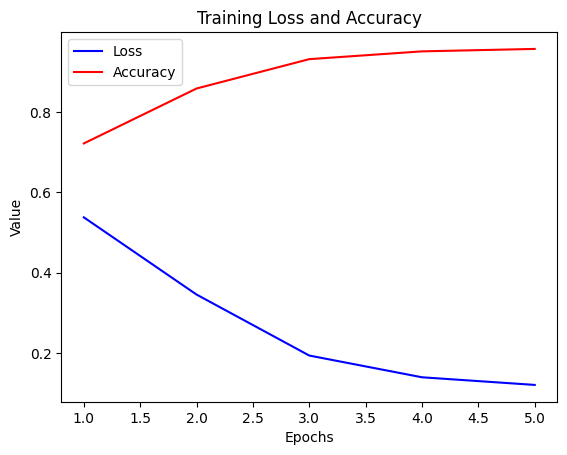

In [ ]:
# Visualizamos la evolución de la pérdida y la precisión del modelo a lo largo
# de las épocas durante el entrenamiento

loss = history.history['loss']
accuracy = history.history['accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Loss')
plt.plot(epochs, accuracy, 'r', label='Accuracy')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

* Durante el entrenamiento, el modelo se expone repetidamente a los datos de entrenamiento en múltiples épocas, y en cada época realiza ajustes en función de la retroalimentación que recibe de la función de pérdida y las métricas de evaluación. A medida que avanzan las épocas, el modelo debería mejorar gradualmente su rendimiento y ajustarse mejor a los datos de entrenamiento.
* Loss: la línea azul en el gráfico representa la pérdida del modelo en cada época. La pérdida es una medida de qué tan lejos está la salida del modelo de los valores esperados. Idealmente, queremos que la pérdida disminuya a medida que el modelo se entrena, lo que indica que está aprendiendo a hacer predicciones más precisas.
* Accuracy: la línea roja en el gráfico representa la precisión del modelo en cada época. La precisión es una medida de qué tan bien coincide la salida del modelo con las etiquetas reales de los datos de entrenamiento. Queremos que la precisión aumente a medida que el modelo se entrena, lo que indica que está mejorando en la clasificación correcta de las reseñas como positivas o negativas.

#### Masking

In [ ]:
# Construimos el modelo utilizando el enfoque funcional, y se maneja el
# enmascaramiento manualmente:

K = keras.backend
embed_size = 128
inputs = keras.layers.Input(shape=[None])
mask = keras.layers.Lambda(lambda inputs: K.not_equal(inputs, 0))(inputs)
z = keras.layers.Embedding(vocab_size + num_oov_buckets, embed_size)(inputs)
z = keras.layers.GRU(128, return_sequences=True)(z, mask=mask)
z = keras.layers.GRU(128)(z, mask=mask)
outputs = keras.layers.Dense(1, activation="sigmoid")(z)
model = keras.models.Model(inputs=[inputs], outputs=[outputs])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(train_set, epochs=5)

Epoch 1/5
782/782 [==============================] - 201s 239ms/step - loss: 0.5336 - accuracy: 0.7239
Epoch 2/5
782/782 [==============================] - 184s 236ms/step - loss: 0.3479 - accuracy: 0.8554
Epoch 3/5
782/782 [==============================] - 184s 236ms/step - loss: 0.1900 - accuracy: 0.9328
Epoch 4/5
782/782 [==============================] - 184s 235ms/step - loss: 0.1368 - accuracy: 0.9517
Epoch 5/5
782/782 [==============================] - 184s 235ms/step - loss: 0.1167 - accuracy: 0.9552


* El siguiente modelo es idéntico al modelo anterior, excepto que se construye utilizando la API funcional y se maneja el enmascaramiento manualmente. Es decir, la diferencia principal entre los dos códigos es el enfoque de construcción del modelo, ya que se especifica explícitamente las conexiones entre las capas y se tiene control del enmascaramiento.
* El objetivo de este código es construir un modelo de red neuronal recurrente que utilice una capa de incrustación, máscaras y capas GRU para procesar secuencias de entrada y producir una salida binaria. La máscara se utiliza para ignorar los tokens de relleno durante el cálculo, lo que mejora el rendimiento del modelo al evitar que los tokens de relleno afecten los resultados finales.
* Esta opción puede ser útil en casos donde se requiere un mayor control sobre el enmascaramiento o cuando se trabaja con modelos más complejos que combinan capas de convolución y capas recurrentes.

#### Reusing Pretrained Embeddings

In [ ]:
# Establecemos una ubicación personalizada para almacenar en caché los módulos
# de TensorFlow Hub.

TFHUB_CACHE_DIR = os.path.join(os.curdir, "my_tfhub_cache")
os.environ["TFHUB_CACHE_DIR"] = TFHUB_CACHE_DIR

* Establecemos una ubicación personalizada para almacenar en caché los módulos de TensorFlow Hub.
* Esto significa que los módulos descargados durante la ejecución del código se almacenarán en el directorio especificado en lugar de la ubicación predeterminada.
* Esto puede ser útil si queremos controlar dónde se guardan los módulos en caché, o si estamos ejecutando el código en un entorno donde no tenemos permisos para escribir en la ubicación predeterminada de la caché.

In [ ]:
# Vamos a utilizar el módulo de incrustación de oraciones nnlm-en-dim50,
# versión 1, en nuestro modelo de análisis de sentimientos.

model = keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1",
  dtype=tf.string, input_shape=[], output_shape=[50]),
  keras.layers.Dense(128, activation="relu"),
  keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

* Creamos un modelo de análisis de sentimientos utilizando un módulo pre-entrenado de TensorFlow Hub. Simplemente navegamos por el repositorio de TF Hub, encontramos el modulo que necesitamos y copiamos el ejemplo de código en nuestro proyecto. El módulo se descargará automáticamente, junto con sus pesos preentrenados, y se incluirá en nuestro modelo.
* La capa hub.KerasLayer descarga el módulo desde la URL proporcionada y se carga dicha capa. Este módulo en particular es un codificador de oraciones. Esta capa está diseñada para procesar cadenas de texto y genera una representación vectorial de 50 dimensiones para cada oración de entrada.

In [ ]:
# Verificamos los archivos descargados y su ubicación en el directorio

for dirpath, dirnames, filenames in os.walk(TFHUB_CACHE_DIR):
    for filename in filenames:
        print(os.path.join(dirpath, filename))

./my_tfhub_cache/82c4aaf4250ffb09088bd48368ee7fd00e5464fe.descriptor.txt
./my_tfhub_cache/82c4aaf4250ffb09088bd48368ee7fd00e5464fe/saved_model.pb
./my_tfhub_cache/82c4aaf4250ffb09088bd48368ee7fd00e5464fe/assets/tokens.txt
./my_tfhub_cache/82c4aaf4250ffb09088bd48368ee7fd00e5464fe/variables/variables.index
./my_tfhub_cache/82c4aaf4250ffb09088bd48368ee7fd00e5464fe/variables/variables.data-00000-of-00001


* De esta manera verificamos que los archivos se hayan descargado correctamente, y tambien para obtener información sobre la estructura y contenido del directorio de caché de TensorFlow Hub.
* El codigo imprime los archivos dentro del directorio TFHUB_CACHE_DIR:
1. descriptor.txt: contiene información como el nombre del modelo, la versión, la descripción, etc.
2. saved_model.pb: contiene la estructura del modelo, incluyendo la definición de las capas, las operaciones y los pesos entrenados.
3. tokens.txt: almacena tokens relacionados con el módulo descargado. Los tokens pueden ser palabras, símbolos o cualquier otra entidad utilizada por el modelo para la codificación o procesamiento de texto.
4. variables.index: almacena un índice que relaciona los nombres de las variables con los archivos que contienen los valores de esas variables.
5. variables.data-00000-of-00001: contiene los valores de las variables del modelo entrenado.

In [ ]:
# A continuación, simplemente podemos cargar el conjunto de datos de reseñas de
# IMDb, sin necesidad de procesarlo previamente (excepto para el agrupamiento
# por lotes y el precargado), y entrenar directamente el modelo:

datasets, info = tfds.load("imdb_reviews", as_supervised=True, with_info=True)
train_size = info.splits["train"].num_examples
batch_size = 32
train_set = datasets["train"].batch(batch_size).prefetch(1)
history = model.fit(train_set, epochs=5)

Epoch 1/5
782/782 [==============================] - 6s 6ms/step - loss: 0.5475 - accuracy: 0.7270
Epoch 2/5
782/782 [==============================] - 4s 5ms/step - loss: 0.5150 - accuracy: 0.7484
Epoch 3/5
782/782 [==============================] - 5s 6ms/step - loss: 0.5095 - accuracy: 0.7514
Epoch 4/5
782/782 [==============================] - 4s 5ms/step - loss: 0.5058 - accuracy: 0.7538
Epoch 5/5
782/782 [==============================] - 4s 5ms/step - loss: 0.5028 - accuracy: 0.7557


* En este caso, no es necesario procesar el conjunto de datos IMDb Reviews porque ya viene preprocesado y listo para usar. El conjunto de datos IMDb Reviews proporcionado por TensorFlow Datasets está etiquetado y listo para su uso en tareas de análisis de sentimientos.
* No se raliza el agrupamiento por lotes y el precargado. Ambos se utilizan para mejorar el rendimiento y la eficiencia del entrenamiento del modelo, permitiendo procesar los datos en lotes y cargar los datos de forma asincrónica.

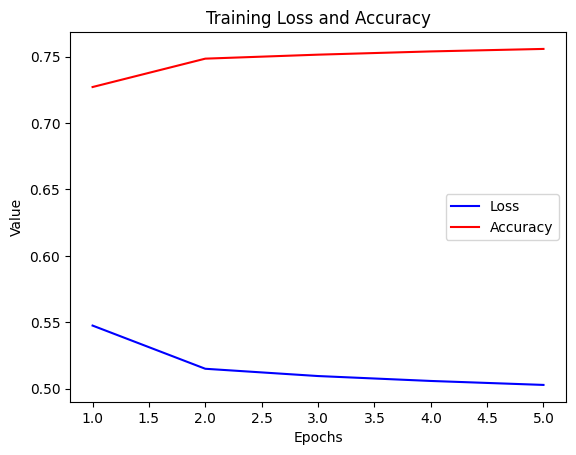

In [ ]:
# Visualizamos la evolución de la pérdida y la precisión del modelo a lo largo
# de las épocas durante el entrenamiento

loss = history.history['loss']
accuracy = history.history['accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Loss')
plt.plot(epochs, accuracy, 'r', label='Accuracy')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

* A diferencia del modelo anterior, podemos observar que el valor de la perdidad disminuye mucho mas rapido y en mayor cantidad. Y la presicion aumenta mucho mas rapido y en mayor cantidad.